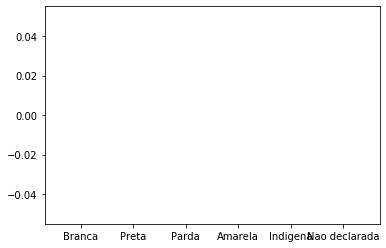

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def num_to_raca(n):
    raca_dict = {1:'Branca',2:'Preta',3:'Parda',4:'Amarela',5:'Indigena',0:'Nao declarada'}
    return raca_dict[n]

colunas_enem = ['NU_NOTA_REDACAO','TP_COR_RACA']
redacao_raca = pd.read_csv('MICRODADOS_ENEM_2018.csv',sep=';',encoding = 'ISO-8859-1',usecols = colunas_enem)

redMedia = redacao_raca['NU_NOTA_REDACAO'].mean()
redMedia = round(redMedia, 2)
redacao_raca.update(redacao_raca['NU_NOTA_REDACAO'].fillna(redMedia))

notas_mil = redacao_raca[redacao_raca['NU_NOTA_REDACAO'] == 1000] #dataframe onde as notas 1000 sao reunidas
num_raca = pd.DataFrame(data=(notas_mil['TP_COR_RACA'].value_counts())) #dataframe com as racas e a quantidade que cada raca aparece

#popula um dicionario com as devidas quantidades que cada raca aparece, substituindo o valor numerico por sua palavra equivalente
df = {'Branca':0,'Preta':0,'Parda':0,'Amarela':0,'Indigena':0,'Nao declarada':0,}
for i in num_raca.iterrows():
    df[num_to_raca(i[0])] = [i[1][0]]

#plota o grafico
plt.bar(range(len(df)),list(df.values()),align='center')
plt.xticks(range(len(df)), list(df.keys()))
plt.show()